In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor, ExtraTreesRegressor, StackingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import math
from scipy.stats import skew

In [15]:
df_house = pd.read_csv('C:/Users/thsong/Downloads/house-prices-advanced-regression-techniques/train.csv')
df_house_test = pd.read_csv('C:/Users/thsong/Downloads/house-prices-advanced-regression-techniques/test.csv')

In [2]:
df_house_extracted = pd.read_csv('C:/Users/thsong/df_house_extracted_tmp.csv')

In [8]:
df_house_extracted_wool = pd.read_csv('C:/Users/thsong/df_house_extracted_wool_tmp.csv')

In [31]:
### define a fuction for printing RMSLE values of each regression model
def print_rmsle_values(model, X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    ### print and return RMSLE values of each model
    print('#'*5, model.__class__.__name__,'#'*5)
    # not to make nan values from np.log1p
    y_test_ = y_test - y_test.min() + 1
    # plug y_test_ into np.log1p
    log_y = np.log1p(y_test_)
    # not to make nan values from np.log1p
    pred_ = pred - pred.min() + 1
    # plug pred_ into np.log1p
    log_pred = np.log1p(pred_)
    # get squared error
    squared_error = (log_y - log_pred)**2 
    rmsle = np.sqrt(np.mean(squared_error))
    # print RMSLE value
    print('RMSLE : {}'.format(rmsle))
    # return RMSLE value
    return rmsle

In [55]:
### define a function for printing best parameters for modeling
def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params, scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X, y) # the same result as .fit(X_train,y_train)
    rmse = np.sqrt(-1*grid_model.best_score_)
    print('when the model {0} is taken with grid search cv = 5 the best avg rmse value is : {1}, and the best parameter is : {2}'.format(model.__class__.__name__, np.round(rmse,4), grid_model.best_params_))

In [ ]:
df_house_extracted

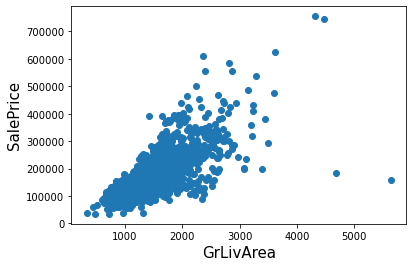

In [276]:
plt.scatter(x = df_house_extracted['GrLivArea'], y = df_house_extracted['SalePrice'])
plt.ylabel('SalePrice',fontsize=15)
plt.xlabel('GrLivArea', fontsize=15)
plt.show()

In [7]:
df_house_extracted.columns

Index(['MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg', 'SalePrice'],
      dtype='object')

In [18]:
# df_house_extracted2 = df_house_extracted.copy(deep=True)
df_house_extracted3 = df_house_extracted.copy(deep=True)
df_house_extracted4 = df_house_extracted.copy(deep=True)
df_house_extracted5 = df_house_extracted.copy(deep=True)

In [94]:
df_house_extracted6 = df_house_extracted.copy(deep=True)

In [176]:
df_house_extracted7 = df_house_extracted.copy(deep=True)
df_house_extracted8 = df_house_extracted.copy(deep=True)
df_house_extracted9 = df_house_extracted.copy(deep=True)
df_house_extracted10 = df_house_extracted.copy(deep=True)
df_house_extracted11 = df_house_extracted.copy(deep=True)

In [239]:
df_house_extracted12 = df_house_extracted.copy(deep=True)
df_house_extracted13 = df_house_extracted.copy(deep=True)
df_house_extracted14 = df_house_extracted.copy(deep=True)
df_house_extracted15 = df_house_extracted.copy(deep=True)
df_house_extracted16 = df_house_extracted.copy(deep=True)

In [ ]:
df_house_extracted3 = df_house_extracted_wool.copy(deep=True)
df_house_extracted4 = df_house_extracted_wool.copy(deep=True)
df_house_extracted5 = df_house_extracted_wool.copy(deep=True)
df_house_extracted6 = df_house_extracted_wool.copy(deep=True)
df_house_extracted7 = df_house_extracted_wool.copy(deep=True)
df_house_extracted8 = df_house_extracted_wool.copy(deep=True)
df_house_extracted9 = df_house_extracted_wool.copy(deep=True)
df_house_extracted10 = df_house_extracted_wool.copy(deep=True)
df_house_extracted11 = df_house_extracted_wool.copy(deep=True)
df_house_extracted12 = df_house_extracted_wool.copy(deep=True)
df_house_extracted13 = df_house_extracted_wool.copy(deep=True)
df_house_extracted14 = df_house_extracted_wool.copy(deep=True)
df_house_extracted15 = df_house_extracted_wool.copy(deep=True)
df_house_extracted16 = df_house_extracted_wool.copy(deep=True) 

In [5]:
df_house_test_extracted = pd.read_csv('C:/Users/thsong/df_house_test_extracted_tmp.csv')

In [279]:
#df_house_test_extracted = pd.read_csv('C:/Users/thsong/df_house_extracted_wool_tmp.csv')

In [21]:
df_house_test_extracted3 = df_house_test_extracted.copy(deep=True)
df_house_test_extracted4 = df_house_test_extracted.copy(deep=True)
df_house_test_extracted5 = df_house_test_extracted.copy(deep=True)

In [53]:
df_house_test_extracted6 = df_house_test_extracted.copy(deep=True)

In [177]:
df_house_test_extracted7 = df_house_test_extracted.copy(deep=True)
df_house_test_extracted8 = df_house_test_extracted.copy(deep=True)
df_house_test_extracted9 = df_house_test_extracted.copy(deep=True)
df_house_test_extracted10 = df_house_test_extracted.copy(deep=True)
df_house_test_extracted11 = df_house_test_extracted.copy(deep=True)

In [240]:
df_house_test_extracted12 = df_house_test_extracted.copy(deep=True)
df_house_test_extracted13 = df_house_test_extracted.copy(deep=True)
df_house_test_extracted14 = df_house_test_extracted.copy(deep=True)
df_house_test_extracted15 = df_house_test_extracted.copy(deep=True)
df_house_test_extracted16 = df_house_test_extracted.copy(deep=True)

In [40]:
df_house_test3 = df_house_test.copy(deep=True)
df_house_test4 = df_house_test.copy(deep=True)
df_house_test5 = df_house_test.copy(deep=True)

In [54]:
df_house_test6 = df_house_test.copy(deep=True)

In [178]:
df_house_test7 = df_house_test.copy(deep=True)
df_house_test8 = df_house_test.copy(deep=True)
df_house_test9 = df_house_test.copy(deep=True)
df_house_test10 = df_house_test.copy(deep=True)
df_house_test11 = df_house_test.copy(deep=True)

In [241]:
df_house_test12 = df_house_test.copy(deep=True)
df_house_test13 = df_house_test.copy(deep=True)
df_house_test14 = df_house_test.copy(deep=True)
df_house_test15 = df_house_test.copy(deep=True)
df_house_test16 = df_house_test.copy(deep=True)

### checking the result of the 3rd trial

In [19]:
### Feature Engineering
df_house_extracted3['IndoorSF'] =  df_house_extracted3['BsmtFinSF1'] + df_house_extracted3['BsmtUnfSF'] \
                                + df_house_extracted3['TotalBsmtSF'] + df_house_extracted3['TotalBsmtSF'] \
                                + df_house_extracted3['1stFlrSF'] \
                                + df_house_extracted3['2ndFlrSF'] + df_house_extracted3['GrLivArea']
df_house_extracted3['OutdoorSF'] = df_house_extracted3['WoodDeckSF'] + df_house_extracted3['OpenPorchSF']
df_house_extracted3.drop(['BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea'],axis=1,inplace=True)
df_house_extracted3.drop(['WoodDeckSF','OpenPorchSF'],axis=1,inplace=True)
df_house_extracted3['GarageArea_Unit'] =  df_house_extracted3['GarageArea'] / df_house_extracted3['GarageCars']
df_house_extracted3['GarageArea_Unit'] = df_house_extracted3['GarageArea_Unit'].fillna(0)
df_house_extracted3.drop(['GarageArea','GarageCars'],axis=1,inplace=True)
#--------------------------------------------------------------------------------
df_house_extracted3['MSSubClass_'] = 0
for i in range(len(df_house_extracted3)):
    if df_house_extracted3.MSSubClass.iloc[i] == 60:
        df_house_extracted3.MSSubClass_.iloc[i] = 299  
    elif df_house_extracted3.MSSubClass.iloc[i] == 20:
        df_house_extracted3.MSSubClass_.iloc[i] = 536
    elif df_house_extracted3.MSSubClass.iloc[i] == 50:
        df_house_extracted3.MSSubClass_.iloc[i] = 144
    elif df_house_extracted3.MSSubClass.iloc[i] == 120:
        df_house_extracted3.MSSubClass_.iloc[i] = 87
    elif df_house_extracted3.MSSubClass.iloc[i] == 30:
        df_house_extracted3.MSSubClass_.iloc[i] = 69
    elif df_house_extracted3.MSSubClass.iloc[i] == 160:
        df_house_extracted3.MSSubClass_.iloc[i] = 63
    elif df_house_extracted3.MSSubClass.iloc[i] == 70:
        df_house_extracted3.MSSubClass_.iloc[i] = 60
    elif df_house_extracted3.MSSubClass.iloc[i] == 80:
        df_house_extracted3.MSSubClass_.iloc[i] = 58
    elif df_house_extracted3.MSSubClass.iloc[i] == 90:
        df_house_extracted3.MSSubClass_.iloc[i] = 52
    elif df_house_extracted3.MSSubClass.iloc[i] == 190:
        df_house_extracted3.MSSubClass_.iloc[i] = 30
    elif df_house_extracted3.MSSubClass.iloc[i] == 85:
        df_house_extracted3.MSSubClass_.iloc[i] = 20
    elif df_house_extracted3.MSSubClass.iloc[i] == 75:    
        df_house_extracted3.MSSubClass_.iloc[i] = 16
    elif df_house_extracted3.MSSubClass.iloc[i] == 45:
        df_house_extracted3.MSSubClass_.iloc[i] = 12
    elif df_house_extracted3.MSSubClass.iloc[i] == 180:
        df_house_extracted3.MSSubClass_.iloc[i] = 10
    elif df_house_extracted3.MSSubClass.iloc[i] == 40:
        df_house_extracted3.MSSubClass_.iloc[i] = 4
#---------------------------------------------------------------------------------
df_house_extracted3.drop(['MSSubClass'],axis=1,inplace=True)
# one hot encodings
LotShape_ohe = pd.get_dummies(df_house['LotShape'],prefix='LotShape')
LotConfig_ohe = pd.get_dummies(df_house['LotConfig'],prefix='LotConfig')
##BldgType_ohe = pd.get_dummies(df_house['BldgType'],prefix='BldgType')
RoofStyle_ohe = pd.get_dummies(df_house['RoofStyle'],prefix='RoofStyle')
MasVnrType_ohe = pd.get_dummies(df_house['MasVnrType'],prefix='MasVnrType')
Foundation_ohe = pd.get_dummies(df_house['Foundation'],prefix='Foundation')
BsmtExposure_ohe = pd.get_dummies(df_house['BsmtExposure'],prefix='BsmtExposure')
BsmtFinType1_ohe = pd.get_dummies(df_house['BsmtFinType1'],prefix='BsmtFinType1')
GarageType_ohe = pd.get_dummies(df_house['GarageType'],prefix='GarageType')
GarageFinish_ohe = pd.get_dummies(df_house['GarageFinish'],prefix='GarageFinish')
# concat the data
df_house_extracted3_ = pd.concat([df_house_extracted3,LotShape_ohe,LotConfig_ohe,RoofStyle_ohe,
                                 MasVnrType_ohe,Foundation_ohe,BsmtExposure_ohe,BsmtFinType1_ohe,GarageType_ohe,GarageFinish_ohe
                                 ],axis = 1)
df_house_extracted3_.drop(['LotShape_','LotConfig_','RoofStyle_' ,'MasVnrType_' ,'Foundation_' ,'BsmtExposure_' , 'BsmtFinType1_', 
                           'GarageType_', 'GarageFinish_'],axis=1,inplace=True)

In [20]:
df_house_extracted3_.columns

Index(['MSZoning_', 'LotFrontage', 'LotArea', 'Neighborhood_', 'HouseStyle_',
       'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual_', 'BsmtQual_',
       'HeatingQC_', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu_',
       'House_Age', 'Garage_Age', 'Exterior_Avg', 'SalePrice', 'IndoorSF',
       'OutdoorSF', 'GarageArea_Unit', 'MSSubClass_', 'LotShape_IR1',
       'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LotConfig_Corner',
       'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3',
       'LotConfig_Inside', 'RoofStyle_Flat', 'RoofStyle_Gable',
       'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard',
       'RoofStyle_Shed', 'MasVnrType_BrkCmn', 'MasVnrType_BrkFace',
       'MasVnrType_None', 'MasVnrType_Stone', 'Foundation_BrkTil',
       'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab',
       'Foundation_Stone', 'Foundation_Wood', 'BsmtExposure_Av',
       'BsmtExposur

In [23]:
scaler = StandardScaler()

In [24]:
col_lst = ['MSZoning_', 'LotFrontage', 'LotArea', 'Neighborhood_', 'HouseStyle_',
       'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual_', 'BsmtQual_',
       'HeatingQC_', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu_',
       'House_Age', 'Garage_Age', 'Exterior_Avg','IndoorSF',
       'OutdoorSF', 'GarageArea_Unit', 'MSSubClass_']
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_extracted3_[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_extracted3_[new_col] = scaled_data_tst
#-----------------------------------------------------------------
log_SalePrice = np.log1p(df_house_extracted3_['SalePrice'])
df_house_extracted3_['SalePrice(log)'] = log_SalePrice

In [35]:
# ordinary linear regression model
line_fitter4 = LinearRegression()
### turned models through series of parameter adjustments
# linear models
ridge_fitter4 = Ridge(alpha=98.7)
lasso_fitter4 = Lasso(alpha=0.00064)
elasticNet_fitter4 = ElasticNet(alpha = 0.08, l1_ratio=0.0001)
# ensemble models
xgb_fitter4 = XGBRegressor(n_estimators=155)
gbm_fitter4 = GradientBoostingRegressor(n_estimators=155)
rf_fitter4 = RandomForestRegressor(n_estimators=182)
lgbm_fitter4 = LGBMRegressor(n_estimators=151)
bg_fitter4 = BaggingRegressor(n_estimators=157)
et_fitter4 = ExtraTreesRegressor(n_estimators=153)

In [29]:
X = df_house_extracted3_[['MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'Neighborhood_(scaled)', 'HouseStyle_(scaled)', 'OverallQual(scaled)',
       'OverallCond(scaled)', 'MasVnrArea(scaled)', 'ExterQual_(scaled)',
       'BsmtQual_(scaled)', 'HeatingQC_(scaled)', 'BsmtFullBath(scaled)',
       'FullBath(scaled)', 'HalfBath(scaled)', 'BedroomAbvGr(scaled)',
       'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)', 'Fireplaces(scaled)',
       'FireplaceQu_(scaled)', 'House_Age(scaled)', 'Garage_Age(scaled)',
       'Exterior_Avg(scaled)', 'IndoorSF(scaled)', 'OutdoorSF(scaled)',
       'GarageArea_Unit(scaled)', 'MSSubClass_(scaled)',
        'LotShape_IR1','LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 
        'LotConfig_Corner','LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3','LotConfig_Inside', 
        'RoofStyle_Flat', 'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyle_Shed', 
        'MasVnrType_BrkCmn', 'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone', 
        'Foundation_BrkTil', 'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood',
       'BsmtExposure_Av', 'BsmtExposure_Gd', 'BsmtExposure_Mn', 'BsmtExposure_No', 
       'BsmtFinType1_ALQ', 'BsmtFinType1_BLQ', 'BsmtFinType1_GLQ', 'BsmtFinType1_LwQ', 'BsmtFinType1_Rec', 'BsmtFinType1_Unf', 
        'GarageType_2Types', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort',
       'GarageType_Detchd', 'GarageFinish_Fin', 'GarageFinish_RFn','GarageFinish_Unf'          
        ]]
y = df_house_extracted3_['SalePrice(log)']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [36]:
### Print RMSLE values using the user-defined function above
dict_rmsle = {}
for model in [line_fitter4,ridge_fitter4,lasso_fitter4,elasticNet_fitter4,xgb_fitter4,gbm_fitter4,rf_fitter4,lgbm_fitter4,bg_fitter4,et_fitter4]:
    rmsle_value = print_rmsle_values(model,X_train.values,X_test.values,y_train.values,y_test.values)
    dict_rmsle[str(model)] = rmsle_value
### Sort RMSLE values in ascending order
{k: v for k, v in sorted(dict_rmsle.items(), key=lambda item: item[1])}

##### LinearRegression #####
RMSLE : 24.086139888737026
##### Ridge #####
RMSLE : 0.15091123003589973
##### Lasso #####
RMSLE : 0.1285817068430045
##### ElasticNet #####
RMSLE : 0.14997419840857043
##### XGBRegressor #####
RMSLE : 0.10867772423341107
##### GradientBoostingRegressor #####
RMSLE : 0.058125983526028775
##### RandomForestRegressor #####
RMSLE : 0.13778147431882437
##### LGBMRegressor #####
RMSLE : 0.1045953098049248
##### BaggingRegressor #####
RMSLE : 0.1372642024949007
##### ExtraTreesRegressor #####
RMSLE : 0.17221380015992932


{'GradientBoostingRegressor(n_estimators=155)': 0.058125983526028775,
 'LGBMRegressor(n_estimators=151)': 0.1045953098049248,
 "XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,\n             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,\n             early_stopping_rounds=None, enable_categorical=False,\n             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',\n             importance_type=None, interaction_constraints='',\n             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,\n             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,\n             missing=nan, monotone_constraints='()', n_estimators=155, n_jobs=0,\n             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,\n             reg_lambda=1, ...)": 0.10867772423341107,
 'Lasso(alpha=0.00064)': 0.1285817068430045,
 'BaggingRegressor(n_estimators=157)': 0.1372642024949007,
 'RandomForestRegressor(n_estimators=182)': 0.1

In [26]:
### Feature Engineering
df_house_test_extracted3['IndoorSF'] =  df_house_test_extracted3['BsmtFinSF1'] + df_house_test_extracted3['BsmtUnfSF'] \
                                + df_house_test_extracted3['TotalBsmtSF'] + df_house_test_extracted3['TotalBsmtSF'] \
                                + df_house_test_extracted3['1stFlrSF'] \
                                + df_house_test_extracted3['2ndFlrSF'] + df_house_test_extracted3['GrLivArea']
df_house_test_extracted3['OutdoorSF'] = df_house_test_extracted3['WoodDeckSF'] + df_house_test_extracted3['OpenPorchSF']
df_house_test_extracted3.drop(['BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea'],axis=1,inplace=True)
df_house_test_extracted3.drop(['WoodDeckSF','OpenPorchSF'],axis=1,inplace=True)
df_house_test_extracted3['GarageArea_Unit'] =  df_house_test_extracted3['GarageArea'] / df_house_test_extracted3['GarageCars']
df_house_test_extracted3['GarageArea_Unit'] = df_house_test_extracted3['GarageArea_Unit'].fillna(0)
df_house_test_extracted3.drop(['GarageArea','GarageCars'],axis=1,inplace=True)
#-----------------------------------------------------------------
df_house_test_extracted3['MSSubClass_'] = 0
for i in range(len(df_house_test_extracted3)):
    if df_house_test_extracted3.MSSubClass.iloc[i] == 60:
        df_house_test_extracted3.MSSubClass_.iloc[i] = 299    
    elif df_house_test_extracted3.MSSubClass.iloc[i] == 20:
        df_house_test_extracted3.MSSubClass_.iloc[i] = 536  
    elif df_house_test_extracted3.MSSubClass.iloc[i] == 50:
        df_house_test_extracted3.MSSubClass_.iloc[i] = 144
    elif df_house_test_extracted3.MSSubClass.iloc[i] == 120:
        df_house_test_extracted3.MSSubClass_.iloc[i] = 87
    elif df_house_test_extracted3.MSSubClass.iloc[i] == 30:
        df_house_test_extracted3.MSSubClass_.iloc[i] = 69
    elif df_house_test_extracted3.MSSubClass.iloc[i] == 160:
        df_house_test_extracted3.MSSubClass_.iloc[i] = 63
    elif df_house_test_extracted3.MSSubClass.iloc[i] == 70:
        df_house_test_extracted3.MSSubClass_.iloc[i] = 60
    elif df_house_test_extracted3.MSSubClass.iloc[i] == 80:
        df_house_test_extracted3.MSSubClass_.iloc[i] = 58
    elif df_house_test_extracted3.MSSubClass.iloc[i] == 90:
        df_house_test_extracted3.MSSubClass_.iloc[i] = 52
    elif df_house_test_extracted3.MSSubClass.iloc[i] == 190:
        df_house_test_extracted3.MSSubClass_.iloc[i] = 30
    elif df_house_test_extracted3.MSSubClass.iloc[i] == 85:
        df_house_test_extracted3.MSSubClass_.iloc[i] = 20
    elif df_house_test_extracted3.MSSubClass.iloc[i] == 75:    
        df_house_test_extracted3.MSSubClass_.iloc[i] = 16
    elif df_house_test_extracted3.MSSubClass.iloc[i] == 45:
        df_house_test_extracted3.MSSubClass_.iloc[i] = 12
    elif df_house_test_extracted3.MSSubClass.iloc[i] == 180:
        df_house_test_extracted3.MSSubClass_.iloc[i] = 10
    elif df_house_test_extracted3.MSSubClass.iloc[i] == 40:
        df_house_test_extracted3.MSSubClass_.iloc[i] = 4
#------------------------
df_house_test_extracted3.drop(['MSSubClass'],axis=1,inplace=True)
#----------------------------------------
LotShape_ohe = pd.get_dummies(df_house_test['LotShape'],prefix='LotShape')
LotConfig_ohe = pd.get_dummies(df_house_test['LotConfig'],prefix='LotConfig')
BldgType_ohe = pd.get_dummies(df_house_test['BldgType'],prefix='BldgType')
RoofStyle_ohe = pd.get_dummies(df_house_test['RoofStyle'],prefix='RoofStyle')
MasVnrType_ohe = pd.get_dummies(df_house_test['MasVnrType'],prefix='MasVnrType')
Foundation_ohe = pd.get_dummies(df_house_test['Foundation'],prefix='Foundation')
BsmtExposure_ohe = pd.get_dummies(df_house_test['BsmtExposure'],prefix='BsmtExposure')
BsmtFinType1_ohe = pd.get_dummies(df_house_test['BsmtFinType1'],prefix='BsmtFinType1')
GarageType_ohe = pd.get_dummies(df_house_test['GarageType'],prefix='GarageType')
GarageFinish_ohe = pd.get_dummies(df_house_test['GarageFinish'],prefix='GarageFinish')
#--------------------------------------------------------------------------------------------------
#--concat--------------------------------------------------------------------------------------------
df_house_test_extracted3_ = pd.concat([df_house_test_extracted3,LotShape_ohe,LotConfig_ohe,BldgType_ohe,RoofStyle_ohe,
                                 MasVnrType_ohe,Foundation_ohe,BsmtExposure_ohe,BsmtFinType1_ohe,GarageType_ohe,GarageFinish_ohe
                                 ],axis = 1 )
#--------------------------------------------
df_house_test_extracted3_.drop(['LotShape_','LotConfig_','RoofStyle_' ,'MasVnrType_' ,'Foundation_' ,'BsmtExposure_' , 'BsmtFinType1_', 'GarageType_', 'GarageFinish_',
                          'BldgType_1Fam', 'BldgType_2fmCon','BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE'
                          ],axis=1,inplace=True)
#-------------------------------------------------------
col_lst = ['MSZoning_', 'LotFrontage', 'LotArea', 'Neighborhood_', 'HouseStyle_',
       'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual_', 'BsmtQual_',
       'HeatingQC_', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu_',
       'House_Age', 'Garage_Age', 'Exterior_Avg','IndoorSF',
       'OutdoorSF', 'GarageArea_Unit', 'MSSubClass_']
#--------------------------------------------------------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_test_extracted3_[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_test_extracted3_[new_col] = scaled_data_tst

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [27]:
df_house_test_extracted3_2b_predicted = df_house_test_extracted3_[['LotShape_IR1', 'LotShape_IR2',
       'LotShape_IR3', 'LotShape_Reg', 'LotConfig_Corner', 'LotConfig_CulDSac',
       'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'RoofStyle_Flat',
       'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip',
       'RoofStyle_Mansard', 'RoofStyle_Shed', 'MasVnrType_BrkCmn',
       'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone',
       'Foundation_BrkTil', 'Foundation_CBlock', 'Foundation_PConc',
       'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood',
       'BsmtExposure_Av', 'BsmtExposure_Gd', 'BsmtExposure_Mn',
       'BsmtExposure_No', 'BsmtFinType1_ALQ', 'BsmtFinType1_BLQ',
       'BsmtFinType1_GLQ', 'BsmtFinType1_LwQ', 'BsmtFinType1_Rec',
       'BsmtFinType1_Unf', 'GarageType_2Types', 'GarageType_Attchd',
       'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort',
       'GarageType_Detchd', 'GarageFinish_Fin', 'GarageFinish_RFn',
       'GarageFinish_Unf', 'MSZoning_(scaled)', 'LotFrontage(scaled)',
       'LotArea(scaled)', 'Neighborhood_(scaled)', 'HouseStyle_(scaled)',
       'OverallQual(scaled)', 'OverallCond(scaled)', 'MasVnrArea(scaled)',
       'ExterQual_(scaled)', 'BsmtQual_(scaled)', 'HeatingQC_(scaled)',
       'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)',
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'Fireplaces(scaled)', 'FireplaceQu_(scaled)', 'House_Age(scaled)',
       'Garage_Age(scaled)', 'Exterior_Avg(scaled)', 'IndoorSF(scaled)',
       'OutdoorSF(scaled)', 'GarageArea_Unit(scaled)', 'MSSubClass_(scaled)']]

In [41]:
result_from_model = gbm_fitter4.predict(df_house_test_extracted3_2b_predicted)
df_house_test3['SalePrice'] = 0
df_house_test3['SalePrice'] = np.expm1(result_from_model)

In [42]:
df_house_test3[['Id','SalePrice']]

,Id,SalePrice
0,1461,150030.969864
1,1462,165979.083047
2,1463,152900.375882
3,1464,153479.460816
4,1465,174748.200146
...,...,...
1454,2915,175365.684383
1455,2916,175365.684383
1456,2917,148203.436304
1457,2918,174410.938514


### checking the result of the 4th trial

In [43]:
### Feature Engineering
df_house_extracted4['IndoorSF'] =  df_house_extracted4['BsmtFinSF1'] + df_house_extracted4['BsmtUnfSF'] \
                                + df_house_extracted4['TotalBsmtSF'] + df_house_extracted4['TotalBsmtSF'] \
                                + df_house_extracted4['1stFlrSF'] \
                                + df_house_extracted4['2ndFlrSF'] + df_house_extracted4['GrLivArea']
df_house_extracted4['OutdoorSF'] = df_house_extracted4['WoodDeckSF'] + df_house_extracted4['OpenPorchSF']
# drop used columns
df_house_extracted4.drop(['BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea'],axis=1,inplace=True)
df_house_extracted4.drop(['WoodDeckSF','OpenPorchSF'],axis=1,inplace=True)
#--------------
# reduced number of one hot encodings
LotShape_ohe = pd.get_dummies(df_house['LotShape'],prefix='LotShape')
MasVnrType_ohe = pd.get_dummies(df_house['MasVnrType'],prefix='MasVnrType')
BsmtExposure_ohe = pd.get_dummies(df_house['BsmtExposure'],prefix='BsmtExposure')
GarageFinish_ohe = pd.get_dummies(df_house['GarageFinish'],prefix='GarageFinish')
#---------------
df_house_extracted4_ = pd.concat([df_house_extracted4,LotShape_ohe,MasVnrType_ohe, BsmtExposure_ohe, GarageFinish_ohe],axis = 1)
df_house_extracted4_.drop(['LotShape_','MasVnrType_' ,'BsmtExposure_' ,'GarageFinish_'],axis=1,inplace=True)
#---------------------------------------------------------------------------------------------------------------
col_lst = ['MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotConfig_',
       'Neighborhood_', 'HouseStyle_', 'OverallQual', 'OverallCond',
       'RoofStyle_', 'MasVnrArea', 'ExterQual_', 'Foundation_', 'BsmtQual_',
       'BsmtFinType1_', 'HeatingQC_', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age', 'GarageCars',
       'GarageArea', 'Exterior_Avg', 'SalePrice', 'IndoorSF', 'OutdoorSF']
#--------------------------------------------------------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_extracted4_[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_extracted4_[new_col] = scaled_data_tst
#-----------------------------------------------------
log_SalePrice = np.log1p(df_house_extracted4_['SalePrice'])
df_house_extracted4_['SalePrice(log)'] = log_SalePrice
#------------------------------
X = df_house_extracted4_[['LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg',
       'MasVnrType_BrkCmn', 'MasVnrType_BrkFace', 'MasVnrType_None',
       'MasVnrType_Stone', 'BsmtExposure_Av', 'BsmtExposure_Gd',
       'BsmtExposure_Mn', 'BsmtExposure_No', 'GarageFinish_Fin',
       'GarageFinish_RFn', 'GarageFinish_Unf', 'MSSubClass(scaled)',
       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotConfig_(scaled)', 'Neighborhood_(scaled)', 'HouseStyle_(scaled)',
       'OverallQual(scaled)', 'OverallCond(scaled)', 'RoofStyle_(scaled)',
       'MasVnrArea(scaled)', 'ExterQual_(scaled)', 'Foundation_(scaled)',
       'BsmtQual_(scaled)', 'BsmtFinType1_(scaled)', 'HeatingQC_(scaled)',
       'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)',
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'Fireplaces(scaled)', 'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'House_Age(scaled)', 'Garage_Age(scaled)', 'GarageCars(scaled)',
       'GarageArea(scaled)', 'Exterior_Avg(scaled)',
       'IndoorSF(scaled)', 'OutdoorSF(scaled)']]
y = df_house_extracted4_['SalePrice(log)']
# split X and y 
# make sure that 'test' here is different from 'test' in df_house_test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [44]:
# ordinary linear regression model
line_fitter5 = LinearRegression()
### turned models through series of parameter adjustments
# linear models
ridge_fitter5 = Ridge(alpha=149)
lasso_fitter5 = Lasso(alpha=0.0018)
elasticNet_fitter5 = ElasticNet(alpha = 0.13, l1_ratio=0.001)
# ensemble models
xgb_fitter5 = XGBRegressor(n_estimators=50)
gbm_fitter5 = GradientBoostingRegressor(n_estimators=161)
rf_fitter5 = RandomForestRegressor(n_estimators=180)
lgbm_fitter5 = LGBMRegressor(n_estimators=126)
bg_fitter5 = BaggingRegressor(n_estimators=162)
et_fitter5 = ExtraTreesRegressor(n_estimators=159)

In [45]:
### Print RMSLE values using the user-defined function above
dict_rmsle = {}
for model in [line_fitter5,ridge_fitter5,lasso_fitter5,elasticNet_fitter5,xgb_fitter5,gbm_fitter5,rf_fitter5,lgbm_fitter5,bg_fitter5,et_fitter5]:
    rmsle_value = print_rmsle_values(model,X_train.values,X_test.values,y_train.values,y_test.values)
    dict_rmsle[str(model)] = rmsle_value
### Sort RMSLE values in ascending order
{k: v for k, v in sorted(dict_rmsle.items(), key=lambda item: item[1])}

##### LinearRegression #####
RMSLE : 0.12991596077842069
##### Ridge #####
RMSLE : 0.1583054896668377
##### Lasso #####
RMSLE : 0.14574610425845388
##### ElasticNet #####
RMSLE : 0.15915185928723077
##### XGBRegressor #####
RMSLE : 0.12472176448088519
##### GradientBoostingRegressor #####
RMSLE : 0.07755916401800982
##### RandomForestRegressor #####
RMSLE : 0.1291696073019251
##### LGBMRegressor #####
RMSLE : 0.1120461502936317
##### BaggingRegressor #####
RMSLE : 0.12385936663628398
##### ExtraTreesRegressor #####
RMSLE : 0.14956524957979211


{'GradientBoostingRegressor(n_estimators=161)': 0.07755916401800982,
 'LGBMRegressor(n_estimators=126)': 0.1120461502936317,
 'BaggingRegressor(n_estimators=162)': 0.12385936663628398,
 "XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,\n             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,\n             early_stopping_rounds=None, enable_categorical=False,\n             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',\n             importance_type=None, interaction_constraints='',\n             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,\n             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,\n             missing=nan, monotone_constraints='()', n_estimators=50, n_jobs=0,\n             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,\n             reg_lambda=1, ...)": 0.12472176448088519,
 'RandomForestRegressor(n_estimators=180)': 0.1291696073019251,
 'LinearRegression()': 0.1299

In [46]:
### Feature Engineering
df_house_test_extracted4['IndoorSF'] =  df_house_test_extracted4['BsmtFinSF1'] + df_house_test_extracted4['BsmtUnfSF'] \
                                + df_house_test_extracted4['TotalBsmtSF'] + df_house_test_extracted4['TotalBsmtSF'] \
                                + df_house_test_extracted4['1stFlrSF'] \
                                + df_house_test_extracted4['2ndFlrSF'] + df_house_test_extracted4['GrLivArea']
df_house_test_extracted4['OutdoorSF'] = df_house_test_extracted4['WoodDeckSF'] + df_house_test_extracted4['OpenPorchSF']
# drop used columns
df_house_test_extracted4.drop(['BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea'],axis=1,inplace=True)
df_house_test_extracted4.drop(['WoodDeckSF','OpenPorchSF'],axis=1,inplace=True)

# reduced number of one hot encodings
LotShape_ohe = pd.get_dummies(df_house_test['LotShape'],prefix='LotShape')
MasVnrType_ohe = pd.get_dummies(df_house_test['MasVnrType'],prefix='MasVnrType')
BsmtExposure_ohe = pd.get_dummies(df_house_test['BsmtExposure'],prefix='BsmtExposure')
GarageFinish_ohe = pd.get_dummies(df_house_test['GarageFinish'],prefix='GarageFinish')

df_house_test_extracted4_ = pd.concat([df_house_test_extracted4,LotShape_ohe,MasVnrType_ohe, BsmtExposure_ohe, GarageFinish_ohe],axis = 1)

df_house_test_extracted4_.drop(['LotShape_','MasVnrType_' ,'BsmtExposure_' ,'GarageFinish_'],axis=1,inplace=True)

col_lst = ['MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotConfig_',
       'Neighborhood_', 'HouseStyle_', 'OverallQual', 'OverallCond',
       'RoofStyle_', 'MasVnrArea', 'ExterQual_', 'Foundation_', 'BsmtQual_',
       'BsmtFinType1_', 'HeatingQC_', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age', 'GarageCars',
       'GarageArea', 'Exterior_Avg', 'IndoorSF', 'OutdoorSF']
#--------------------------------------------------------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_test_extracted4_[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_test_extracted4_[new_col] = scaled_data_tst

In [47]:
df_house_test_extracted4_2b_predicted = df_house_test_extracted4_[['LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg',
       'MasVnrType_BrkCmn', 'MasVnrType_BrkFace', 'MasVnrType_None',
       'MasVnrType_Stone', 'BsmtExposure_Av', 'BsmtExposure_Gd',
       'BsmtExposure_Mn', 'BsmtExposure_No', 'GarageFinish_Fin',
       'GarageFinish_RFn', 'GarageFinish_Unf', 'MSSubClass(scaled)',
       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotConfig_(scaled)', 'Neighborhood_(scaled)', 'HouseStyle_(scaled)',
       'OverallQual(scaled)', 'OverallCond(scaled)', 'RoofStyle_(scaled)',
       'MasVnrArea(scaled)', 'ExterQual_(scaled)', 'Foundation_(scaled)',
       'BsmtQual_(scaled)', 'BsmtFinType1_(scaled)', 'HeatingQC_(scaled)',
       'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)',
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'Fireplaces(scaled)', 'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'House_Age(scaled)', 'Garage_Age(scaled)', 'GarageCars(scaled)',
       'GarageArea(scaled)', 'Exterior_Avg(scaled)',
       'IndoorSF(scaled)', 'OutdoorSF(scaled)']]

In [48]:
result_from_model2 = gbm_fitter5.predict(df_house_test_extracted4_2b_predicted)

In [49]:
df_house_test4['SalePrice'] = 0
df_house_test4['SalePrice'] = np.expm1(result_from_model2)

In [50]:
df_house_test4[['Id','SalePrice']]

,Id,SalePrice
0,1461,125693.912665
1,1462,162388.140971
2,1463,174395.629767
3,1464,191257.975861
4,1465,180862.441224
...,...,...
1454,2915,82099.655363
1455,2916,91063.413328
1456,2917,187658.485909
1457,2918,113136.105453


In [51]:
df_house_test4[['Id','SalePrice']].to_csv('C:/Users/thsong/submission7_2.csv',index=False)

### 5th trial

In [58]:
### Feature Engineering
# df_house_extracted5['IndoorSF'] =  df_house_extracted5['BsmtFinSF1'] + df_house_extracted5['BsmtUnfSF'] \
#                                 + df_house_extracted5['TotalBsmtSF'] + df_house_extracted5['TotalBsmtSF'] \
#                                 + df_house_extracted5['1stFlrSF'] \
#                                 + df_house_extracted5['2ndFlrSF'] + df_house_extracted5['GrLivArea']
# df_house_extracted5['OutdoorSF'] = df_house_extracted5['WoodDeckSF'] + df_house_extracted5['OpenPorchSF']
# # drop used columns
# df_house_extracted5.drop(['BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea'],axis=1,inplace=True)
# df_house_extracted5.drop(['WoodDeckSF','OpenPorchSF'],axis=1,inplace=True)
#=======================================================================================================================================
# reduced number of one hot encodings
LotShape_ohe = pd.get_dummies(df_house['LotShape'],prefix='LotShape')
MasVnrType_ohe = pd.get_dummies(df_house['MasVnrType'],prefix='MasVnrType')
BsmtExposure_ohe = pd.get_dummies(df_house['BsmtExposure'],prefix='BsmtExposure')
GarageFinish_ohe = pd.get_dummies(df_house['GarageFinish'],prefix='GarageFinish')
#---------------
df_house_extracted5_ = pd.concat([df_house_extracted5,LotShape_ohe,MasVnrType_ohe, BsmtExposure_ohe, GarageFinish_ohe],axis = 1)
df_house_extracted5_.drop(['LotShape_','MasVnrType_' ,'BsmtExposure_' ,'GarageFinish_'],axis=1,inplace=True)
#=======================================================================================================================================
col_lst = ['MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotConfig_',
       'Neighborhood_', 'HouseStyle_', 'OverallQual', 'OverallCond',
       'RoofStyle_', 'MasVnrArea', 'ExterQual_', 'Foundation_', 'BsmtQual_',
       'BsmtFinType1_', 'HeatingQC_', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age', 'GarageCars',
       'GarageArea', 'Exterior_Avg', 'SalePrice']
#--------------------------------------------------------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_extracted5_[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_extracted5_[new_col] = scaled_data_tst
#-----------------------------------------------------
log_SalePrice = np.log1p(df_house_extracted5_['SalePrice'])
df_house_extracted5_['SalePrice(log)'] = log_SalePrice
#------------------------------
X = df_house_extracted5_[['LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg',
       'MasVnrType_BrkCmn', 'MasVnrType_BrkFace', 'MasVnrType_None',
       'MasVnrType_Stone', 'BsmtExposure_Av', 'BsmtExposure_Gd',
       'BsmtExposure_Mn', 'BsmtExposure_No', 'GarageFinish_Fin',
       'GarageFinish_RFn', 'GarageFinish_Unf', 'MSSubClass(scaled)',
       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotConfig_(scaled)', 'Neighborhood_(scaled)', 'HouseStyle_(scaled)',
       'OverallQual(scaled)', 'OverallCond(scaled)', 'RoofStyle_(scaled)',
       'MasVnrArea(scaled)', 'ExterQual_(scaled)', 'Foundation_(scaled)',
       'BsmtQual_(scaled)', 'BsmtFinType1_(scaled)', 'HeatingQC_(scaled)',
       'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)',
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'Fireplaces(scaled)', 'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'House_Age(scaled)', 'Garage_Age(scaled)', 'GarageCars(scaled)',
       'GarageArea(scaled)', 'Exterior_Avg(scaled)']]
y = df_house_extracted5_['SalePrice(log)']
# split X and y 
# make sure that 'test' here is different from 'test' in df_house_test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#### Tuning the models (5th trial)

In [62]:
ridge_params2 = {'alpha':[78,78.1,78.2,78.3,78.4,78.5,78.6]}
print_best_params(ridge_fitter5,ridge_params2)

when the model Ridge is taken with grid search cv = 5 the best avg rmse value is : 0.1529, and the best parameter is : {'alpha': 78.5}


In [68]:
lasso_params2 = {'alpha':[0.0017,0.0018,0.0019,0.002]}
print_best_params(lasso_fitter5,lasso_params2)

when the model Lasso is taken with grid search cv = 5 the best avg rmse value is : 0.1532, and the best parameter is : {'alpha': 0.0019}


In [77]:
eln_params2 = {'alpha':[0.01,0.03,0.04,0.05,0.06,0.065,0.066,0.067,0.068,0.069,0.07,0.071,0.072,0.073,0.074],
            'l1_ratio':[0.0001]} # just 0.0001, not zero
print_best_params(elasticNet_fitter5,eln_params2)

when the model ElasticNet is taken with grid search cv = 5 the best avg rmse value is : 0.1529, and the best parameter is : {'alpha': 0.068, 'l1_ratio': 0.0001}


In [78]:
candidate_params = {'n_estimators' : [150,151,152,153,154,155,156,157,158,159,160,161,162,163,164]}
print_best_params(xgb_fitter5,candidate_params)

when the model XGBRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.155, and the best parameter is : {'n_estimators': 155}


In [80]:
candidate_params = {'n_estimators' : [162,163,164,165,166,167,168,169,170]}
print_best_params(gbm_fitter5,candidate_params)

when the model GradientBoostingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1443, and the best parameter is : {'n_estimators': 165}


In [81]:
candidate_params = {'n_estimators' : [150,151,152,153,154,155,156,157,158,159,160,161,162,163,164]}
print_best_params(rf_fitter5,candidate_params)

when the model RandomForestRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1555, and the best parameter is : {'n_estimators': 156}


In [84]:
candidate_params = {'n_estimators' : [120,130,140,145,146,147,148,149,150,151,152,153,154,155]}
print_best_params(lgbm_fitter5,candidate_params)

when the model LGBMRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1478, and the best parameter is : {'n_estimators': 150}


In [85]:
candidate_params = {'n_estimators' : [150,151,152,153,154,155,156,157,158,159,160,161,162,163,164]}
print_best_params(bg_fitter5,candidate_params)

when the model BaggingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1559, and the best parameter is : {'n_estimators': 153}


In [86]:
candidate_params = {'n_estimators' : [150,151,152,153,154,155,156,157,158,159,160,161,162,163,164]}
print_best_params(et_fitter5,candidate_params)

when the model ExtraTreesRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1552, and the best parameter is : {'n_estimators': 152}


#### modeling, evaluating, and predicting (5th trial)

In [87]:
# ordinary linear regression model
line_fitter6 = LinearRegression()
### turned models through series of parameter adjustments
# linear models
ridge_fitter6 = Ridge(alpha=78.5)
lasso_fitter6 = Lasso(alpha=0.0019)
elasticNet_fitter6 = ElasticNet(alpha = 0.068, l1_ratio=0.0001)
# ensemble models
xgb_fitter6 = XGBRegressor(n_estimators=155)
gbm_fitter6 = GradientBoostingRegressor(n_estimators=165)
rf_fitter6 = RandomForestRegressor(n_estimators=156)
lgbm_fitter6 = LGBMRegressor(n_estimators=150)
bg_fitter6 = BaggingRegressor(n_estimators=153)
et_fitter6 = ExtraTreesRegressor(n_estimators=152)

In [88]:
### Print RMSLE values using the user-defined function above
dict_rmsle = {}
for model in [line_fitter6,ridge_fitter6,lasso_fitter6,elasticNet_fitter6,xgb_fitter6,gbm_fitter6,rf_fitter6,lgbm_fitter6,bg_fitter6,et_fitter6]:
    rmsle_value = print_rmsle_values(model,X_train.values,X_test.values,y_train.values,y_test.values)
    dict_rmsle[str(model)] = rmsle_value
### Sort RMSLE values in ascending order
{k: v for k, v in sorted(dict_rmsle.items(), key=lambda item: item[1])}

##### LinearRegression #####
RMSLE : 0.1433213252723834
##### Ridge #####
RMSLE : 0.15719034138322352
##### Lasso #####
RMSLE : 0.15396166814290826
##### ElasticNet #####
RMSLE : 0.157329330260398
##### XGBRegressor #####
RMSLE : 0.16088338683796177
##### GradientBoostingRegressor #####
RMSLE : 0.07352283922471585
##### RandomForestRegressor #####
RMSLE : 0.11762316466618823
##### LGBMRegressor #####
RMSLE : 0.14380626895282755
##### BaggingRegressor #####
RMSLE : 0.11514550963050897
##### ExtraTreesRegressor #####
RMSLE : 0.18372789593559952


{'GradientBoostingRegressor(n_estimators=165)': 0.07352283922471585,
 'BaggingRegressor(n_estimators=153)': 0.11514550963050897,
 'RandomForestRegressor(n_estimators=156)': 0.11762316466618823,
 'LinearRegression()': 0.1433213252723834,
 'LGBMRegressor(n_estimators=150)': 0.14380626895282755,
 'Lasso(alpha=0.0019)': 0.15396166814290826,
 'Ridge(alpha=78.5)': 0.15719034138322352,
 'ElasticNet(alpha=0.068, l1_ratio=0.0001)': 0.157329330260398,
 "XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,\n             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,\n             early_stopping_rounds=None, enable_categorical=False,\n             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',\n             importance_type=None, interaction_constraints='',\n             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,\n             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,\n             missing=nan, monotone_constraints='()

In [89]:
### Feature Engineering
# df_house_test_extracted5['IndoorSF'] =  df_house_test_extracted5['BsmtFinSF1'] + df_house_test_extracted5['BsmtUnfSF'] \
#                                 + df_house_test_extracted5['TotalBsmtSF'] + df_house_test_extracted5['TotalBsmtSF'] \
#                                 + df_house_test_extracted5['1stFlrSF'] \
#                                 + df_house_test_extracted5['2ndFlrSF'] + df_house_test_extracted5['GrLivArea']
# df_house_test_extracted5['OutdoorSF'] = df_house_test_extracted5['WoodDeckSF'] + df_house_test_extracted5['OpenPorchSF']
# # drop used columns
# df_house_test_extracted5.drop(['BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea'],axis=1,inplace=True)
# df_house_test_extracted5.drop(['WoodDeckSF','OpenPorchSF'],axis=1,inplace=True)
#======================================================================================================================================
# reduced number of one hot encodings
LotShape_ohe = pd.get_dummies(df_house_test['LotShape'],prefix='LotShape')
MasVnrType_ohe = pd.get_dummies(df_house_test['MasVnrType'],prefix='MasVnrType')
BsmtExposure_ohe = pd.get_dummies(df_house_test['BsmtExposure'],prefix='BsmtExposure')
GarageFinish_ohe = pd.get_dummies(df_house_test['GarageFinish'],prefix='GarageFinish')
df_house_test_extracted5_ = pd.concat([df_house_test_extracted5,LotShape_ohe,MasVnrType_ohe, BsmtExposure_ohe, GarageFinish_ohe],axis = 1)
df_house_test_extracted5_.drop(['LotShape_','MasVnrType_' ,'BsmtExposure_' ,'GarageFinish_'],axis=1,inplace=True)
#======================================================================================================================================
col_lst = ['MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotConfig_',
       'Neighborhood_', 'HouseStyle_', 'OverallQual', 'OverallCond',
       'RoofStyle_', 'MasVnrArea', 'ExterQual_', 'Foundation_', 'BsmtQual_',
       'BsmtFinType1_', 'HeatingQC_', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age', 'GarageCars',
       'GarageArea', 'Exterior_Avg']
#--------------------------------------------------------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_test_extracted5_[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_test_extracted5_[new_col] = scaled_data_tst

In [90]:
df_house_test_extracted5_2b_predicted = df_house_test_extracted5_[['LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg',
       'MasVnrType_BrkCmn', 'MasVnrType_BrkFace', 'MasVnrType_None',
       'MasVnrType_Stone', 'BsmtExposure_Av', 'BsmtExposure_Gd',
       'BsmtExposure_Mn', 'BsmtExposure_No', 'GarageFinish_Fin',
       'GarageFinish_RFn', 'GarageFinish_Unf', 'MSSubClass(scaled)',
       'MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotConfig_(scaled)', 'Neighborhood_(scaled)', 'HouseStyle_(scaled)',
       'OverallQual(scaled)', 'OverallCond(scaled)', 'RoofStyle_(scaled)',
       'MasVnrArea(scaled)', 'ExterQual_(scaled)', 'Foundation_(scaled)',
       'BsmtQual_(scaled)', 'BsmtFinType1_(scaled)', 'HeatingQC_(scaled)',
       'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)',
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'Fireplaces(scaled)', 'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'House_Age(scaled)', 'Garage_Age(scaled)', 'GarageCars(scaled)',
       'GarageArea(scaled)', 'Exterior_Avg(scaled)']]
result_from_model3 = gbm_fitter6.predict(df_house_test_extracted5_2b_predicted)
df_house_test5['SalePrice'] = 0
df_house_test5['SalePrice'] = np.expm1(result_from_model3)
df_house_test5[['Id','SalePrice']]

,Id,SalePrice
0,1461,126103.857678
1,1462,152296.428817
2,1463,165954.854838
3,1464,183630.973183
4,1465,180139.668145
...,...,...
1454,2915,80973.947559
1455,2916,89445.912706
1456,2917,188409.736017
1457,2918,114581.581310


In [91]:
df_house_test5[['Id','SalePrice']].to_csv('C:/Users/thsong/submission8.csv',index=False)

### 6th trial

In [95]:
### Feature Engineering
df_house_extracted6['IndoorSF'] =  df_house_extracted6['BsmtFinSF1'] + df_house_extracted6['BsmtUnfSF'] \
                                + df_house_extracted6['TotalBsmtSF'] + df_house_extracted6['TotalBsmtSF'] \
                                + df_house_extracted6['1stFlrSF'] \
                                + df_house_extracted6['2ndFlrSF'] + df_house_extracted6['GrLivArea']
df_house_extracted6['OutdoorSF'] = df_house_extracted6['WoodDeckSF'] + df_house_extracted6['OpenPorchSF']
# drop used columns
df_house_extracted6.drop(['BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea'],axis=1,inplace=True)
df_house_extracted6.drop(['WoodDeckSF','OpenPorchSF'],axis=1,inplace=True)
#=======================================================================================================================================
# # reduced number of one hot encodings
# LotShape_ohe = pd.get_dummies(df_house['LotShape'],prefix='LotShape')
# MasVnrType_ohe = pd.get_dummies(df_house['MasVnrType'],prefix='MasVnrType')
# BsmtExposure_ohe = pd.get_dummies(df_house['BsmtExposure'],prefix='BsmtExposure')
# GarageFinish_ohe = pd.get_dummies(df_house['GarageFinish'],prefix='GarageFinish')
# #---------------
# df_house_extracted6_ = pd.concat([df_house_extracted6,LotShape_ohe,MasVnrType_ohe, BsmtExposure_ohe, GarageFinish_ohe],axis = 1)
# df_house_extracted6_.drop(['LotShape_','MasVnrType_' ,'BsmtExposure_' ,'GarageFinish_'],axis=1,inplace=True)
#=======================================================================================================================================
col_lst = [
        'LotShape_','MasVnrType_','BsmtExposure_','GarageFinish_',
    
        'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotConfig_',
       'Neighborhood_', 'HouseStyle_', 'OverallQual', 'OverallCond',
       'RoofStyle_', 'MasVnrArea', 'ExterQual_', 'Foundation_', 'BsmtQual_',
       'BsmtFinType1_', 'HeatingQC_', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age', 'GarageCars',
       'GarageArea', 'Exterior_Avg', 'SalePrice', 'IndoorSF', 'OutdoorSF']
#--------------------------------------------------------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_extracted6[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_extracted6[new_col] = scaled_data_tst
#-----------------------------------------------------
log_SalePrice = np.log1p(df_house_extracted6['SalePrice'])
df_house_extracted6['SalePrice(log)'] = log_SalePrice
#------------------------------
X = df_house_extracted6[[
        'LotShape_(scaled)','MasVnrType_(scaled)','BsmtExposure_(scaled)','GarageFinish_(scaled)',                
        
        'MSSubClass(scaled)','MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotConfig_(scaled)', 'Neighborhood_(scaled)', 'HouseStyle_(scaled)',
       'OverallQual(scaled)', 'OverallCond(scaled)', 'RoofStyle_(scaled)',
       'MasVnrArea(scaled)', 'ExterQual_(scaled)', 'Foundation_(scaled)',
       'BsmtQual_(scaled)', 'BsmtFinType1_(scaled)', 'HeatingQC_(scaled)',
       'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)',
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'Fireplaces(scaled)', 'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'House_Age(scaled)', 'Garage_Age(scaled)', 'GarageCars(scaled)',
       'GarageArea(scaled)', 'Exterior_Avg(scaled)',
       'IndoorSF(scaled)', 'OutdoorSF(scaled)']]
y = df_house_extracted6['SalePrice(log)']
# split X and y 
# make sure that 'test' here is different from 'test' in df_house_test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#### Tuning the models (6th trial)

In [100]:
ridge_params2 = {'alpha':[165,166,167,168,169,170,171,172,173,174]}
print_best_params(ridge_fitter5,ridge_params2)

when the model Ridge is taken with grid search cv = 5 the best avg rmse value is : 0.1523, and the best parameter is : {'alpha': 171}


In [107]:
lasso_params2 = {'alpha':[0.0023,0.0024,0.0025,0.0026,0.0027,0.0028,0.003]}
print_best_params(lasso_fitter5,lasso_params2)

when the model Lasso is taken with grid search cv = 5 the best avg rmse value is : 0.1535, and the best parameter is : {'alpha': 0.0024}


In [111]:
eln_params2 = {'alpha':[0.074,0.08,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
            'l1_ratio':[0.0001,0.001,0.01,0.1,1]} # just 0.0001, not zero
print_best_params(elasticNet_fitter5,eln_params2)

when the model ElasticNet is taken with grid search cv = 5 the best avg rmse value is : 0.1523, and the best parameter is : {'alpha': 0.1, 'l1_ratio': 0.01}


In [116]:
candidate_params = {'n_estimators' : [90,100,110,111]}
print_best_params(xgb_fitter5,candidate_params)

when the model XGBRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1428, and the best parameter is : {'n_estimators': 110}


In [117]:
candidate_params = {'n_estimators' : [162,163,164,165,166,167,168,169,170]}
print_best_params(gbm_fitter5,candidate_params)

when the model GradientBoostingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1297, and the best parameter is : {'n_estimators': 167}


In [120]:
candidate_params = {'n_estimators' : [140,145,146,147,148,149,150,151]}
print_best_params(rf_fitter5,candidate_params)

when the model RandomForestRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1442, and the best parameter is : {'n_estimators': 148}


In [122]:
candidate_params = {'n_estimators' : [115,116,117,118,119,120,121]}
print_best_params(lgbm_fitter5,candidate_params)

when the model LGBMRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1349, and the best parameter is : {'n_estimators': 116}


In [123]:
candidate_params = {'n_estimators' : [150,151,152,153,154,155,156,157,158,159,160,161,162,163,164]}
print_best_params(bg_fitter5,candidate_params)

when the model BaggingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1441, and the best parameter is : {'n_estimators': 155}


In [125]:
candidate_params = {'n_estimators' : [160,161,162,163,164,165,166]}
print_best_params(et_fitter5,candidate_params)

when the model ExtraTreesRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1411, and the best parameter is : {'n_estimators': 163}


#### modeling, evaluating, and predicting (6th trial)

In [126]:
# ordinary linear regression model
line_fitter7 = LinearRegression()
### turned models through series of parameter adjustments
# linear models
ridge_fitter7 = Ridge(alpha=171)
lasso_fitter7 = Lasso(alpha=0.0024)
elasticNet_fitter7 = ElasticNet(alpha = 0.1, l1_ratio=0.001)
# ensemble models
xgb_fitter7 = XGBRegressor(n_estimators=110)
gbm_fitter7 = GradientBoostingRegressor(n_estimators=167)
rf_fitter7 = RandomForestRegressor(n_estimators=148)
lgbm_fitter7 = LGBMRegressor(n_estimators=116)
bg_fitter7 = BaggingRegressor(n_estimators=155)
et_fitter7 = ExtraTreesRegressor(n_estimators=163)

In [127]:
### Print RMSLE values using the user-defined function above
dict_rmsle = {}
for model in [line_fitter7,ridge_fitter7,lasso_fitter7,elasticNet_fitter7,xgb_fitter7,gbm_fitter7,rf_fitter7,lgbm_fitter7,bg_fitter7,et_fitter7]:
    rmsle_value = print_rmsle_values(model,X_train.values,X_test.values,y_train.values,y_test.values)
    dict_rmsle[str(model)] = rmsle_value
### Sort RMSLE values in ascending order
{k: v for k, v in sorted(dict_rmsle.items(), key=lambda item: item[1])}

##### LinearRegression #####
RMSLE : 0.1378444976733832
##### Ridge #####
RMSLE : 0.15876820593967056
##### Lasso #####
RMSLE : 0.14605514145023765
##### ElasticNet #####
RMSLE : 0.15348942078351083
##### XGBRegressor #####
RMSLE : 0.134234166618854
##### GradientBoostingRegressor #####
RMSLE : 0.06682462867398456
##### RandomForestRegressor #####
RMSLE : 0.12243313396813654
##### LGBMRegressor #####
RMSLE : 0.10268879201726082
##### BaggingRegressor #####
RMSLE : 0.12545236603021082
##### ExtraTreesRegressor #####
RMSLE : 0.14356653683158443


{'GradientBoostingRegressor(n_estimators=167)': 0.06682462867398456,
 'LGBMRegressor(n_estimators=116)': 0.10268879201726082,
 'RandomForestRegressor(n_estimators=148)': 0.12243313396813654,
 'BaggingRegressor(n_estimators=155)': 0.12545236603021082,
 "XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,\n             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,\n             early_stopping_rounds=None, enable_categorical=False,\n             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',\n             importance_type=None, interaction_constraints='',\n             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,\n             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,\n             missing=nan, monotone_constraints='()', n_estimators=110, n_jobs=0,\n             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,\n             reg_lambda=1, ...)": 0.134234166618854,
 'LinearRegression()': 0.137

In [128]:
### Feature Engineering
df_house_test_extracted6['IndoorSF'] =  df_house_test_extracted6['BsmtFinSF1'] + df_house_test_extracted6['BsmtUnfSF'] \
                                + df_house_test_extracted6['TotalBsmtSF'] + df_house_test_extracted6['TotalBsmtSF'] \
                                + df_house_test_extracted6['1stFlrSF'] \
                                + df_house_test_extracted6['2ndFlrSF'] + df_house_test_extracted6['GrLivArea']
df_house_test_extracted6['OutdoorSF'] = df_house_test_extracted6['WoodDeckSF'] + df_house_test_extracted6['OpenPorchSF']
# drop used columns
df_house_test_extracted6.drop(['BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea'],axis=1,inplace=True)
df_house_test_extracted6.drop(['WoodDeckSF','OpenPorchSF'],axis=1,inplace=True)

#=======================================================================================================================================
# # reduced number of one hot encodings
# LotShape_ohe = pd.get_dummies(df_house_test['LotShape'],prefix='LotShape')
# MasVnrType_ohe = pd.get_dummies(df_house_test['MasVnrType'],prefix='MasVnrType')
# BsmtExposure_ohe = pd.get_dummies(df_house_test['BsmtExposure'],prefix='BsmtExposure')
# GarageFinish_ohe = pd.get_dummies(df_house_test['GarageFinish'],prefix='GarageFinish')
# df_house_test_extracted6_ = pd.concat([df_house_test_extracted6,LotShape_ohe,MasVnrType_ohe, BsmtExposure_ohe, GarageFinish_ohe],axis = 1)
# df_house_test_extracted6_.drop(['LotShape_','MasVnrType_' ,'BsmtExposure_' ,'GarageFinish_'],axis=1,inplace=True)
#=======================================================================================================================================
col_lst = [
        'LotShape_','MasVnrType_' ,'BsmtExposure_' ,'GarageFinish_',
    
        'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotConfig_',
       'Neighborhood_', 'HouseStyle_', 'OverallQual', 'OverallCond',
       'RoofStyle_', 'MasVnrArea', 'ExterQual_', 'Foundation_', 'BsmtQual_',
       'BsmtFinType1_', 'HeatingQC_', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age', 'GarageCars',
       'GarageArea', 'Exterior_Avg', 'IndoorSF', 'OutdoorSF']
#--------------------------------------------------------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_test_extracted6[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_test_extracted6[new_col] = scaled_data_tst

In [129]:
df_house_test_extracted6_2b_predicted = df_house_test_extracted6[[
        'LotShape_(scaled)','MasVnrType_(scaled)','BsmtExposure_(scaled)','GarageFinish_(scaled)',
        
        'MSSubClass(scaled)','MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotConfig_(scaled)', 'Neighborhood_(scaled)', 'HouseStyle_(scaled)',
       'OverallQual(scaled)', 'OverallCond(scaled)', 'RoofStyle_(scaled)',
       'MasVnrArea(scaled)', 'ExterQual_(scaled)', 'Foundation_(scaled)',
       'BsmtQual_(scaled)', 'BsmtFinType1_(scaled)', 'HeatingQC_(scaled)',
       'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)',
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'Fireplaces(scaled)', 'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'House_Age(scaled)', 'Garage_Age(scaled)', 'GarageCars(scaled)',
       'GarageArea(scaled)', 'Exterior_Avg(scaled)',
       'IndoorSF(scaled)', 'OutdoorSF(scaled)']]
result_from_model4 = gbm_fitter7.predict(df_house_test_extracted6_2b_predicted)
df_house_test6['SalePrice'] = 0
df_house_test6['SalePrice'] = np.expm1(result_from_model4)
df_house_test6[['Id','SalePrice']]

,Id,SalePrice
0,1461,124203.758754
1,1462,167328.030224
2,1463,176327.952849
3,1464,191670.258745
4,1465,178827.714588
...,...,...
1454,2915,81083.194442
1455,2916,90254.482749
1456,2917,186014.625362
1457,2918,112860.923656


In [130]:
df_house_test6[['Id','SalePrice']].to_csv('C:/Users/thsong/submission9.csv',index=False)

### test relationship between RMSLE and actual Kaggle Score

In [ ]:
line_fitter7,ridge_fitter7,lasso_fitter7,elasticNet_fitter7,xgb_fitter7,
#gbm_fitter7,
rf_fitter7,lgbm_fitter7,bg_fitter7,et_fitter7

In [131]:
# result_from_model4_2 = line_fitter7.predict(df_house_test_extracted6_2b_predicted)
# df_house_test6['SalePrice'] = 0
# df_house_test6['SalePrice'] = np.expm1(result_from_model4_2)
# df_house_test6[['Id','SalePrice']].to_csv('C:/Users/thsong/submission9_2.csv',index=False)
#-----------------------------------------------------------------------------------------------
result_from_model4_3 = ridge_fitter7.predict(df_house_test_extracted6_2b_predicted)
df_house_test6['SalePrice'] = 0
df_house_test6['SalePrice'] = np.expm1(result_from_model4_3)
df_house_test6[['Id','SalePrice']].to_csv('C:/Users/thsong/submission9_3.csv',index=False)
#---------------------------------------------------------------------------------------------
result_from_model4_4 = lasso_fitter7.predict(df_house_test_extracted6_2b_predicted)
df_house_test6['SalePrice'] = 0
df_house_test6['SalePrice'] = np.expm1(result_from_model4_4)
df_house_test6[['Id','SalePrice']].to_csv('C:/Users/thsong/submission9_4.csv',index=False)
#---------------------------------------------------
result_from_model4_5 = elasticNet_fitter7.predict(df_house_test_extracted6_2b_predicted)
df_house_test6['SalePrice'] = 0
df_house_test6['SalePrice'] = np.expm1(result_from_model4_5)
df_house_test6[['Id','SalePrice']].to_csv('C:/Users/thsong/submission9_5.csv',index=False)
#------------------------------------------------------
result_from_model4_6 = xgb_fitter7.predict(df_house_test_extracted6_2b_predicted)
df_house_test6['SalePrice'] = 0
df_house_test6['SalePrice'] = np.expm1(result_from_model4_6)
df_house_test6[['Id','SalePrice']].to_csv('C:/Users/thsong/submission9_6.csv',index=False)
#---------------------------------------------------
result_from_model4_7 = lgbm_fitter7.predict(df_house_test_extracted6_2b_predicted)
df_house_test6['SalePrice'] = 0
df_house_test6['SalePrice'] = np.expm1(result_from_model4_7)
df_house_test6[['Id','SalePrice']].to_csv('C:/Users/thsong/submission9_7.csv',index=False)
#----------------------
result_from_model4_8 = bg_fitter7.predict(df_house_test_extracted6_2b_predicted)
df_house_test6['SalePrice'] = 0
df_house_test6['SalePrice'] = np.expm1(result_from_model4_8)
df_house_test6[['Id','SalePrice']].to_csv('C:/Users/thsong/submission9_8.csv',index=False)
#------------------------
result_from_model4_9 = et_fitter7.predict(df_house_test_extracted6_2b_predicted)
df_house_test6['SalePrice'] = 0
df_house_test6['SalePrice'] = np.expm1(result_from_model4_9)
df_house_test6[['Id','SalePrice']].to_csv('C:/Users/thsong/submission9_9.csv',index=False)
#-----------------------------

### 7th trial, using statistics

In [179]:
### Feature Engineering

# trial 1 : remove GarageCars or GarageArea, and compare each case
# trial 2 : remove OverallQual
# trial 3 : remove 'TotalBsmtSF' or '1stFlrSF', and compare each case

### Trial 1 ###

#=======================================================================================================================================
col_lst = [
    'LotShape_','MasVnrType_' ,'BsmtExposure_' ,'GarageFinish_',
    
    'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotConfig_',
       'Neighborhood_', 'HouseStyle_', 'OverallQual', 'OverallCond',
       'RoofStyle_', 'MasVnrArea', 'ExterQual_', 'Foundation_', 'BsmtQual_',
       'BsmtFinType1_', 'HeatingQC_', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age', 
           
       'GarageArea', 'Exterior_Avg', 'SalePrice'] #  'GarageCars',
#--------------------------------------------------------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_extracted7[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_extracted7[new_col] = scaled_data_tst
#-----------------------------------------------------
log_SalePrice = np.log1p(df_house_extracted7['SalePrice'])
df_house_extracted7['SalePrice(log)'] = log_SalePrice
#------------------------------
X = df_house_extracted7[[
    'LotShape_(scaled)','MasVnrType_(scaled)' ,'BsmtExposure_(scaled)' ,'GarageFinish_(scaled)',
    
    'MSSubClass(scaled)','MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
    'LotConfig_(scaled)', 'Neighborhood_(scaled)', 'HouseStyle_(scaled)','OverallQual(scaled)', 
    'OverallCond(scaled)', 'RoofStyle_(scaled)','MasVnrArea(scaled)', 'ExterQual_(scaled)', 
    'Foundation_(scaled)','BsmtQual_(scaled)', 'BsmtFinType1_(scaled)', 'HeatingQC_(scaled)',
    'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)','BedroomAbvGr(scaled)', 
    'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)','Fireplaces(scaled)', 'FireplaceQu_(scaled)', 
    'GarageType_(scaled)','House_Age(scaled)', 'Garage_Age(scaled)', 
    
    'GarageArea(scaled)', 'Exterior_Avg(scaled)']]   # 'GarageCars(scaled)',
y = df_house_extracted7['SalePrice(log)']
# split X and y 
# make sure that 'test' here is different from 'test' in df_house_test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [180]:
ridge_params2 = {'alpha':[60,61,62,63,64,65,66,67,68,69]}
print_best_params(ridge_fitter5,ridge_params2)

when the model Ridge is taken with grid search cv = 5 the best avg rmse value is : 0.1535, and the best parameter is : {'alpha': 64}


In [183]:
lasso_params2 = {'alpha':[0.0025,0.0026,0.0027,0.0028,0.0029,0.003,0.004,0.005]}
print_best_params(lasso_fitter5,lasso_params2)

when the model Lasso is taken with grid search cv = 5 the best avg rmse value is : 0.1533, and the best parameter is : {'alpha': 0.0026}


In [184]:
eln_params2 = {'alpha':[0.01,0.02,0.03,0.04,0.05],
            'l1_ratio':[0.022,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4]} # just 0.0001, not zero
print_best_params(elasticNet_fitter5,eln_params2)

when the model ElasticNet is taken with grid search cv = 5 the best avg rmse value is : 0.1533, and the best parameter is : {'alpha': 0.03, 'l1_ratio': 0.07}


In [187]:
candidate_params = {'n_estimators' : [45,46,47,48,49,50,51,52]}
print_best_params(xgb_fitter5,candidate_params)

when the model XGBRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1542, and the best parameter is : {'n_estimators': 46}


In [188]:
candidate_params = {'n_estimators' : [162,163,164,165,166,167,168,169,170]}
print_best_params(gbm_fitter5,candidate_params)

when the model GradientBoostingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1449, and the best parameter is : {'n_estimators': 170}


In [189]:
candidate_params = {'n_estimators' : [150,151,152,153,154,155,156,157,158,159,160,161,162,163,164]}
print_best_params(rf_fitter5,candidate_params)

when the model RandomForestRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1552, and the best parameter is : {'n_estimators': 160}


In [212]:
candidate_params = {'n_estimators' : [125,126,127,128,129,130,131,132,133,134]}
print_best_params(lgbm_fitter5,candidate_params)

when the model LGBMRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1479, and the best parameter is : {'n_estimators': 126}


In [191]:
candidate_params = {'n_estimators' : [125,126,127,128,129,130,131,132,133,134]}
print_best_params(bg_fitter5,candidate_params)

when the model BaggingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1564, and the best parameter is : {'n_estimators': 130}


In [192]:
candidate_params = {'n_estimators' : [125,126,127,128,129,130,131,132,133,134]}
print_best_params(et_fitter5,candidate_params)

when the model ExtraTreesRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1541, and the best parameter is : {'n_estimators': 129}


In [193]:
# ordinary linear regression model
line_fitter8 = LinearRegression()
### turned models through series of parameter adjustments
# linear models
ridge_fitter8 = Ridge(alpha=64)
lasso_fitter8 = Lasso(alpha=0.0026)
elasticNet_fitter8 = ElasticNet(alpha = 0.03, l1_ratio=0.07)
# ensemble models
xgb_fitter8 = XGBRegressor(n_estimators=46)
gbm_fitter8 = GradientBoostingRegressor(n_estimators=170)
rf_fitter8 = RandomForestRegressor(n_estimators=160)
lgbm_fitter8 = LGBMRegressor(n_estimators=126) # 131
bg_fitter8 = BaggingRegressor(n_estimators=130)
et_fitter8 = ExtraTreesRegressor(n_estimators=129)

In [194]:
### Print RMSLE values using the user-defined function above
dict_rmsle = {}
for model in [line_fitter8,ridge_fitter8,lasso_fitter8,elasticNet_fitter8,xgb_fitter8,gbm_fitter8,rf_fitter8,lgbm_fitter8,bg_fitter8,et_fitter8]:
    rmsle_value = print_rmsle_values(model,X_train.values,X_test.values,y_train.values,y_test.values)
    dict_rmsle[str(model)] = rmsle_value
### Sort RMSLE values in ascending order
{k: v for k, v in sorted(dict_rmsle.items(), key=lambda item: item[1])}

##### LinearRegression #####
RMSLE : 0.1480156248189644
##### Ridge #####
RMSLE : 0.15600280698192492
##### Lasso #####
RMSLE : 0.15881256234206031
##### ElasticNet #####
RMSLE : 0.16104571627241304
##### XGBRegressor #####
RMSLE : 0.10462008677492687
##### GradientBoostingRegressor #####
RMSLE : 0.09161093829821752
##### RandomForestRegressor #####
RMSLE : 0.11960123947244279
##### LGBMRegressor #####
RMSLE : 0.1492636059341525
##### BaggingRegressor #####
RMSLE : 0.14430963845595396
##### ExtraTreesRegressor #####
RMSLE : 0.18625276235786517


{'GradientBoostingRegressor(n_estimators=170)': 0.09161093829821752,
 "XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,\n             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,\n             early_stopping_rounds=None, enable_categorical=False,\n             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',\n             importance_type=None, interaction_constraints='',\n             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,\n             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,\n             missing=nan, monotone_constraints='()', n_estimators=46, n_jobs=0,\n             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,\n             reg_lambda=1, ...)": 0.10462008677492687,
 'RandomForestRegressor(n_estimators=160)': 0.11960123947244279,
 'BaggingRegressor(n_estimators=130)': 0.14430963845595396,
 'LinearRegression()': 0.1480156248189644,
 'LGBMRegressor(n_estimators=131)': 0.149

In [195]:
### Feature Engineering
#=======================================================================================================================================
col_lst = [
        'LotShape_','MasVnrType_' ,'BsmtExposure_' ,'GarageFinish_',
    
        'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotConfig_',
       'Neighborhood_', 'HouseStyle_', 'OverallQual', 'OverallCond',
       'RoofStyle_', 'MasVnrArea', 'ExterQual_', 'Foundation_', 'BsmtQual_',
       'BsmtFinType1_', 'HeatingQC_', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age', 
       'GarageArea', 'Exterior_Avg'] # 'GarageCars',
#--------------------------------------------------------------
#------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_test_extracted7[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_test_extracted7[new_col] = scaled_data_tst

In [196]:
df_house_test_extracted7_2b_predicted = df_house_test_extracted7[[
        'LotShape_(scaled)','MasVnrType_(scaled)','BsmtExposure_(scaled)','GarageFinish_(scaled)',
        
        'MSSubClass(scaled)','MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotConfig_(scaled)', 'Neighborhood_(scaled)', 'HouseStyle_(scaled)',
       'OverallQual(scaled)', 'OverallCond(scaled)', 'RoofStyle_(scaled)',
       'MasVnrArea(scaled)', 'ExterQual_(scaled)', 'Foundation_(scaled)',
       'BsmtQual_(scaled)', 'BsmtFinType1_(scaled)', 'HeatingQC_(scaled)',
       'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)',
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'Fireplaces(scaled)', 'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'House_Age(scaled)', 'Garage_Age(scaled)', 
       'GarageArea(scaled)', 'Exterior_Avg(scaled)']] # 'GarageCars(scaled)',
result_from_model5 = gbm_fitter8.predict(df_house_test_extracted7_2b_predicted)
df_house_test7['SalePrice'] = 0
df_house_test7['SalePrice'] = np.expm1(result_from_model5)
df_house_test7[['Id','SalePrice']]

,Id,SalePrice
0,1461,132077.338905
1,1462,158130.863642
2,1463,166672.089576
3,1464,183600.450780
4,1465,197646.031415
...,...,...
1454,2915,85734.217076
1455,2916,93691.104993
1456,2917,179474.415726
1457,2918,113803.956677


In [197]:
df_house_test7[['Id','SalePrice']].to_csv('C:/Users/thsong/submission10_1.csv',index=False)

In [174]:
len(X.columns), len(df_house_test_extracted7_2b_predicted.columns)

(29, 33)

In [198]:
### Feature Engineering

# trial 1 : remove GarageCars or GarageArea, and compare each case
# trial 2 : remove OverallQual
# trial 3 : remove 'TotalBsmtSF' or '1stFlrSF', and compare each case

### Trial 1 ###

#=======================================================================================================================================
col_lst = [
    'LotShape_','MasVnrType_' ,'BsmtExposure_' ,'GarageFinish_',
    
    'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotConfig_',
       'Neighborhood_', 'HouseStyle_', 'OverallQual', 'OverallCond',
       'RoofStyle_', 'MasVnrArea', 'ExterQual_', 'Foundation_', 'BsmtQual_',
       'BsmtFinType1_', 'HeatingQC_', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age', 
       'GarageCars',    
        'Exterior_Avg', 'SalePrice'] #  'GarageArea',
#--------------------------------------------------------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_extracted8[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_extracted8[new_col] = scaled_data_tst
#-----------------------------------------------------
log_SalePrice = np.log1p(df_house_extracted8['SalePrice'])
df_house_extracted8['SalePrice(log)'] = log_SalePrice
#------------------------------
X = df_house_extracted8[[
    'LotShape_(scaled)','MasVnrType_(scaled)' ,'BsmtExposure_(scaled)' ,'GarageFinish_(scaled)',
    
    'MSSubClass(scaled)','MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
    'LotConfig_(scaled)', 'Neighborhood_(scaled)', 'HouseStyle_(scaled)','OverallQual(scaled)', 
    'OverallCond(scaled)', 'RoofStyle_(scaled)','MasVnrArea(scaled)', 'ExterQual_(scaled)', 
    'Foundation_(scaled)','BsmtQual_(scaled)', 'BsmtFinType1_(scaled)', 'HeatingQC_(scaled)',
    'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)','BedroomAbvGr(scaled)', 
    'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)','Fireplaces(scaled)', 'FireplaceQu_(scaled)', 
    'GarageType_(scaled)','House_Age(scaled)', 'Garage_Age(scaled)', 
    'GarageCars(scaled)',
     'Exterior_Avg(scaled)']]   # 'GarageArea(scaled)',
y = df_house_extracted8['SalePrice(log)']
# split X and y 
# make sure that 'test' here is different from 'test' in df_house_test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [201]:
ridge_params2 = {'alpha':[60,61,62,63,64,65,66,67,68,69]}
print_best_params(ridge_fitter5,ridge_params2)

when the model Ridge is taken with grid search cv = 5 the best avg rmse value is : 0.1535, and the best parameter is : {'alpha': 66}


In [202]:
lasso_params2 = {'alpha':[0.0025,0.0026,0.0027,0.0028,0.0029,0.003,0.004,0.005]}
print_best_params(lasso_fitter5,lasso_params2)

when the model Lasso is taken with grid search cv = 5 the best avg rmse value is : 0.1532, and the best parameter is : {'alpha': 0.0029}


In [203]:
eln_params2 = {'alpha':[0.01,0.02,0.03,0.04,0.05],
            'l1_ratio':[0.022,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4]} # just 0.0001, not zero
print_best_params(elasticNet_fitter5,eln_params2)

when the model ElasticNet is taken with grid search cv = 5 the best avg rmse value is : 0.1532, and the best parameter is : {'alpha': 0.03, 'l1_ratio': 0.08}


In [206]:
candidate_params = {'n_estimators' : [75,76,77,78,79,80,81,82,83,84]}
print_best_params(xgb_fitter5,candidate_params)

when the model XGBRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1552, and the best parameter is : {'n_estimators': 80}


In [207]:
candidate_params = {'n_estimators' : [162,163,164,165,166,167,168,169,170]}
print_best_params(gbm_fitter5,candidate_params)

when the model GradientBoostingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1441, and the best parameter is : {'n_estimators': 167}


In [208]:
candidate_params = {'n_estimators' : [150,151,152,153,154,155,156,157,158,159,160,161,162,163,164]}
print_best_params(rf_fitter5,candidate_params)

when the model RandomForestRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1564, and the best parameter is : {'n_estimators': 152}


In [213]:
candidate_params = {'n_estimators' : [125,126,127,128,129,130,131,132,133,134]}
print_best_params(lgbm_fitter5,candidate_params)

when the model LGBMRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1479, and the best parameter is : {'n_estimators': 126}


In [210]:
candidate_params = {'n_estimators' : [125,126,127,128,129,130,131,132,133,134]}
print_best_params(bg_fitter5,candidate_params)

when the model BaggingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1559, and the best parameter is : {'n_estimators': 131}


In [211]:
candidate_params = {'n_estimators' : [125,126,127,128,129,130,131,132,133,134]}
print_best_params(et_fitter5,candidate_params)

when the model ExtraTreesRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1555, and the best parameter is : {'n_estimators': 126}


In [214]:
# ordinary linear regression model
line_fitter9 = LinearRegression()
### turned models through series of parameter adjustments
# linear models
ridge_fitter9 = Ridge(alpha=66)
lasso_fitter9 = Lasso(alpha=0.0029)
elasticNet_fitter9 = ElasticNet(alpha = 0.03, l1_ratio=0.08)
# ensemble models
xgb_fitter9 = XGBRegressor(n_estimators=80)
gbm_fitter9 = GradientBoostingRegressor(n_estimators=167)
rf_fitter9 = RandomForestRegressor(n_estimators=152)
lgbm_fitter9 = LGBMRegressor(n_estimators=126)
bg_fitter9 = BaggingRegressor(n_estimators=131)
et_fitter9 = ExtraTreesRegressor(n_estimators=126)

In [215]:
### Print RMSLE values using the user-defined function above
dict_rmsle = {}
for model in [line_fitter9,ridge_fitter9,lasso_fitter9,elasticNet_fitter9,xgb_fitter9,gbm_fitter9,rf_fitter9,lgbm_fitter9,bg_fitter9,et_fitter9]:
    rmsle_value = print_rmsle_values(model,X_train.values,X_test.values,y_train.values,y_test.values)
    dict_rmsle[str(model)] = rmsle_value
### Sort RMSLE values in ascending order
{k: v for k, v in sorted(dict_rmsle.items(), key=lambda item: item[1])}

##### LinearRegression #####
RMSLE : 0.1475649872711532
##### Ridge #####
RMSLE : 0.15562514133321165
##### Lasso #####
RMSLE : 0.1556617697729713
##### ElasticNet #####
RMSLE : 0.15832544938863252
##### XGBRegressor #####
RMSLE : 0.12453260568730064
##### GradientBoostingRegressor #####
RMSLE : 0.09066758872370619
##### RandomForestRegressor #####
RMSLE : 0.11779033569597686
##### LGBMRegressor #####
RMSLE : 0.157146773945332
##### BaggingRegressor #####
RMSLE : 0.11811903209990288
##### ExtraTreesRegressor #####
RMSLE : 0.17940815188223921


{'GradientBoostingRegressor(n_estimators=167)': 0.09066758872370619,
 'RandomForestRegressor(n_estimators=152)': 0.11779033569597686,
 'BaggingRegressor(n_estimators=131)': 0.11811903209990288,
 "XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,\n             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,\n             early_stopping_rounds=None, enable_categorical=False,\n             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',\n             importance_type=None, interaction_constraints='',\n             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,\n             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,\n             missing=nan, monotone_constraints='()', n_estimators=80, n_jobs=0,\n             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,\n             reg_lambda=1, ...)": 0.12453260568730064,
 'LinearRegression()': 0.1475649872711532,
 'Ridge(alpha=66)': 0.15562514133321165,


In [216]:
### Feature Engineering
#=======================================================================================================================================
col_lst = [
        'LotShape_','MasVnrType_' ,'BsmtExposure_' ,'GarageFinish_',
    
        'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotConfig_',
       'Neighborhood_', 'HouseStyle_', 'OverallQual', 'OverallCond',
       'RoofStyle_', 'MasVnrArea', 'ExterQual_', 'Foundation_', 'BsmtQual_',
       'BsmtFinType1_', 'HeatingQC_', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age', 
       'GarageCars',
    'Exterior_Avg'] #  'GarageArea',
#--------------------------------------------------------------
#------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_test_extracted8[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_test_extracted8[new_col] = scaled_data_tst

In [218]:
df_house_test_extracted8_2b_predicted = df_house_test_extracted8[[
        'LotShape_(scaled)','MasVnrType_(scaled)','BsmtExposure_(scaled)','GarageFinish_(scaled)',
        
        'MSSubClass(scaled)','MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotConfig_(scaled)', 'Neighborhood_(scaled)', 'HouseStyle_(scaled)',
       'OverallQual(scaled)', 'OverallCond(scaled)', 'RoofStyle_(scaled)',
       'MasVnrArea(scaled)', 'ExterQual_(scaled)', 'Foundation_(scaled)',
       'BsmtQual_(scaled)', 'BsmtFinType1_(scaled)', 'HeatingQC_(scaled)',
       'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)',
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'Fireplaces(scaled)', 'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'House_Age(scaled)', 'Garage_Age(scaled)', 
       'GarageCars(scaled)', 
    
    'Exterior_Avg(scaled)']] # 'GarageArea(scaled)',
result_from_model6 = gbm_fitter9.predict(df_house_test_extracted8_2b_predicted)
df_house_test8['SalePrice'] = 0
df_house_test8['SalePrice'] = np.expm1(result_from_model6)
df_house_test8[['Id','SalePrice']]

,Id,SalePrice
0,1461,127973.845970
1,1462,148902.787503
2,1463,165887.778492
3,1464,182759.299502
4,1465,190715.869895
...,...,...
1454,2915,84495.246426
1455,2916,92238.436310
1456,2917,180986.851692
1457,2918,110286.705379


In [219]:
df_house_test8[['Id','SalePrice']].to_csv('C:/Users/thsong/submission10_2.csv',index=False)

In [243]:
### Feature Engineering

# trial 1 : remove GarageCars or GarageArea, and compare each case
##--- trial 2 : remove OverallQual -------------------------------------
# trial 3 : remove 'TotalBsmtSF' or '1stFlrSF', and compare each case (aborted : because of early trial on the SF combination)

### Trial 1 ###

#=======================================================================================================================================
col_lst = [
    'LotShape_','MasVnrType_' ,'BsmtExposure_' ,'GarageFinish_',
    
    'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotConfig_',
       'Neighborhood_', 'HouseStyle_',  'OverallCond',
       'RoofStyle_', 'MasVnrArea', 'ExterQual_', 'Foundation_', 'BsmtQual_',
       'BsmtFinType1_', 'HeatingQC_', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age', 
       'GarageCars', 'GarageArea',   
        'Exterior_Avg', 'SalePrice'] #  'OverallQual',
#--------------------------------------------------------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_extracted9[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_extracted9[new_col] = scaled_data_tst
#-----------------------------------------------------
log_SalePrice = np.log1p(df_house_extracted9['SalePrice'])
df_house_extracted9['SalePrice(log)'] = log_SalePrice
#------------------------------
X = df_house_extracted9[[
    'LotShape_(scaled)','MasVnrType_(scaled)' ,'BsmtExposure_(scaled)' ,'GarageFinish_(scaled)',
    
    'MSSubClass(scaled)','MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
    'LotConfig_(scaled)', 'Neighborhood_(scaled)', 'HouseStyle_(scaled)',
    'OverallCond(scaled)', 'RoofStyle_(scaled)','MasVnrArea(scaled)', 'ExterQual_(scaled)', 
    'Foundation_(scaled)','BsmtQual_(scaled)', 'BsmtFinType1_(scaled)', 'HeatingQC_(scaled)',
    'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)','BedroomAbvGr(scaled)', 
    'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)','Fireplaces(scaled)', 'FireplaceQu_(scaled)', 
    'GarageType_(scaled)','House_Age(scaled)', 'Garage_Age(scaled)', 
    'GarageCars(scaled)', 'GarageArea(scaled)', 
     'Exterior_Avg(scaled)']]   # 'OverallQual(scaled)', 
y = df_house_extracted9['SalePrice(log)'] 
# split X and y 
# make sure that 'test' here is different from 'test' in df_house_test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [247]:
ridge_params2 = {'alpha':[114,115,116,117,118,119]}
print_best_params(ridge_fitter5,ridge_params2)

when the model Ridge is taken with grid search cv = 5 the best avg rmse value is : 0.165, and the best parameter is : {'alpha': 115}


In [250]:
lasso_params2 = {'alpha':[0.0021,0.0022,0.0023,0.0024,0.0025,0.0026,0.0027,0.0028,0.0029]}
print_best_params(lasso_fitter5,lasso_params2)

when the model Lasso is taken with grid search cv = 5 the best avg rmse value is : 0.1652, and the best parameter is : {'alpha': 0.0024}


In [257]:
eln_params2 = {'alpha':[0.05,0.06,0.07,0.08],
            'l1_ratio':[0.016,0.017,0.018,0.019,0.02,0.021,0.022]} # just 0.0001, not zero
print_best_params(elasticNet_fitter5,eln_params2)

when the model ElasticNet is taken with grid search cv = 5 the best avg rmse value is : 0.1649, and the best parameter is : {'alpha': 0.08, 'l1_ratio': 0.017}


In [259]:
candidate_params = {'n_estimators' : [44,45,46,47,48]}
print_best_params(xgb_fitter5,candidate_params)

when the model XGBRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1613, and the best parameter is : {'n_estimators': 46}


In [263]:
candidate_params = {'n_estimators' : [255,256,257,258,259,260,261,262,263,264]}
print_best_params(gbm_fitter5,candidate_params)

when the model GradientBoostingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1508, and the best parameter is : {'n_estimators': 260}


In [264]:
candidate_params = {'n_estimators' : [150,151,152,153,154,155,156,157,158,159,160,161,162,163,164]}
print_best_params(rf_fitter5,candidate_params)

when the model RandomForestRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1625, and the best parameter is : {'n_estimators': 153}


In [265]:
candidate_params = {'n_estimators' : [125,126,127,128,129,130,131,132,133,134]}
print_best_params(lgbm_fitter5,candidate_params)

when the model LGBMRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1533, and the best parameter is : {'n_estimators': 129}


In [266]:
candidate_params = {'n_estimators' : [125,126,127,128,129,130,131,132,133,134]}
print_best_params(bg_fitter5,candidate_params)

when the model BaggingRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1628, and the best parameter is : {'n_estimators': 132}


In [270]:
candidate_params = {'n_estimators' : [171,172,173,174,175,176]}
print_best_params(et_fitter5,candidate_params)

when the model ExtraTreesRegressor is taken with grid search cv = 5 the best avg rmse value is : 0.1631, and the best parameter is : {'n_estimators': 172}


In [271]:
# ordinary linear regression model
line_fitter10 = LinearRegression()
### turned models through series of parameter adjustments
# linear models
ridge_fitter10 = Ridge(alpha=115)
lasso_fitter10 = Lasso(alpha=0.0024)
elasticNet_fitter10 = ElasticNet(alpha = 0.08, l1_ratio=0.017)
# ensemble models
xgb_fitter10 = XGBRegressor(n_estimators=46)
gbm_fitter10 = GradientBoostingRegressor(n_estimators=260)
rf_fitter10 = RandomForestRegressor(n_estimators=153)
lgbm_fitter10 = LGBMRegressor(n_estimators=129)
bg_fitter10 = BaggingRegressor(n_estimators=132)
et_fitter10 = ExtraTreesRegressor(n_estimators=172)

In [272]:
### Print RMSLE values using the user-defined function above
dict_rmsle = {}
for model in [line_fitter10,ridge_fitter10,lasso_fitter10,elasticNet_fitter10,xgb_fitter10,gbm_fitter10,rf_fitter10,lgbm_fitter10,bg_fitter10,et_fitter10]:
    rmsle_value = print_rmsle_values(model,X_train.values,X_test.values,y_train.values,y_test.values)
    dict_rmsle[str(model)] = rmsle_value
### Sort RMSLE values in ascending order
{k: v for k, v in sorted(dict_rmsle.items(), key=lambda item: item[1])}

##### LinearRegression #####
RMSLE : 0.20049298065126903
##### Ridge #####
RMSLE : 0.20528249575590493
##### Lasso #####
RMSLE : 0.20756186282051606
##### ElasticNet #####
RMSLE : 0.20737681361797952
##### XGBRegressor #####
RMSLE : 0.1517458672699774
##### GradientBoostingRegressor #####
RMSLE : 0.09256139994425654
##### RandomForestRegressor #####
RMSLE : 0.1448956316013022
##### LGBMRegressor #####
RMSLE : 0.1312998352921603
##### BaggingRegressor #####
RMSLE : 0.15958030003053356
##### ExtraTreesRegressor #####
RMSLE : 0.17331326577275558


{'GradientBoostingRegressor(n_estimators=260)': 0.09256139994425654,
 'LGBMRegressor(n_estimators=129)': 0.1312998352921603,
 'RandomForestRegressor(n_estimators=153)': 0.1448956316013022,
 "XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,\n             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,\n             early_stopping_rounds=None, enable_categorical=False,\n             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',\n             importance_type=None, interaction_constraints='',\n             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,\n             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,\n             missing=nan, monotone_constraints='()', n_estimators=46, n_jobs=0,\n             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,\n             reg_lambda=1, ...)": 0.1517458672699774,
 'BaggingRegressor(n_estimators=132)': 0.15958030003053356,
 'ExtraTreesRegressor(n_estima

In [273]:
### Feature Engineering
#=======================================================================================================================================
col_lst = [
        'LotShape_','MasVnrType_' ,'BsmtExposure_' ,'GarageFinish_',
    
        'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotConfig_',
       'Neighborhood_', 'HouseStyle_', 'OverallCond',
       'RoofStyle_', 'MasVnrArea', 'ExterQual_', 'Foundation_', 'BsmtQual_',
       'BsmtFinType1_', 'HeatingQC_', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age', 
       'GarageCars', 'GarageArea',
    'Exterior_Avg'] #  'OverallQual', 
#--------------------------------------------------------------
#------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_test_extracted9[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_test_extracted9[new_col] = scaled_data_tst
###====================================================================
df_house_test_extracted9_2b_predicted = df_house_test_extracted9[[
        'LotShape_(scaled)','MasVnrType_(scaled)','BsmtExposure_(scaled)','GarageFinish_(scaled)',
        
        'MSSubClass(scaled)','MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
       'LotConfig_(scaled)', 'Neighborhood_(scaled)', 'HouseStyle_(scaled)',
        'OverallCond(scaled)', 'RoofStyle_(scaled)',
       'MasVnrArea(scaled)', 'ExterQual_(scaled)', 'Foundation_(scaled)',
       'BsmtQual_(scaled)', 'BsmtFinType1_(scaled)', 'HeatingQC_(scaled)',
       'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)',
       'BedroomAbvGr(scaled)', 'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)',
       'Fireplaces(scaled)', 'FireplaceQu_(scaled)', 'GarageType_(scaled)',
       'House_Age(scaled)', 'Garage_Age(scaled)', 
       'GarageCars(scaled)', 'GarageArea(scaled)',
    
    'Exterior_Avg(scaled)']] # 'OverallQual(scaled)',
result_from_model7 = gbm_fitter10.predict(df_house_test_extracted9_2b_predicted)
df_house_test9['SalePrice'] = 0
df_house_test9['SalePrice'] = np.expm1(result_from_model7)
df_house_test9[['Id','SalePrice']]

,Id,SalePrice
0,1461,124323.985935
1,1462,155742.479384
2,1463,177688.133940
3,1464,189144.277466
4,1465,161220.992974
...,...,...
1454,2915,88161.910107
1455,2916,97702.703829
1456,2917,188761.777600
1457,2918,115447.761757


In [274]:
df_house_test9[['Id','SalePrice']].to_csv('C:/Users/thsong/submission10_3.csv',index=False)

#### adding unextracted columns

In [220]:
df_house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [281]:
df_house.BldgType.value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [221]:
df_house_extracted.columns

Index(['MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotShape_',
       'LotConfig_', 'Neighborhood_', 'HouseStyle_', 'OverallQual',
       'OverallCond', 'RoofStyle_', 'MasVnrType_', 'MasVnrArea', 'ExterQual_',
       'Foundation_', 'BsmtQual_', 'BsmtExposure_', 'BsmtFinType1_',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC_', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age',
       'GarageFinish_', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'Exterior_Avg', 'SalePrice'],
      dtype='object')

In [225]:
df_house_columns_tst = df_house.columns.values
df_house_extracted_columns_tst = df_house_extracted.columns.values

In [236]:
set_difference = set(df_house_columns_tst) - set(df_house_extracted_columns_tst)
list_difference = list(set_difference)

In [238]:
print(set_difference)

{'MoSold', 'Exterior2nd', 'GarageType', 'RoofStyle', 'Utilities', 'GarageCond', 'Neighborhood', 'Foundation', 'MiscFeature', 'LandContour', 'SaleType', 'GarageQual', 'ExterCond', 'LotConfig', 'RoofMatl', 'GarageFinish', 'SaleCondition', 'BsmtQual', '3SsnPorch', 'Id', 'Heating', 'YrSold', 'MSZoning', 'EnclosedPorch', 'BsmtCond', 'ExterQual', 'YearBuilt', 'PavedDrive', 'LowQualFinSF', 'BsmtFinSF2', 'KitchenQual', 'MiscVal', 'FireplaceQu', 'BsmtHalfBath', 'HeatingQC', 'Alley', 'BsmtFinType1', 'HouseStyle', 'Functional', 'Condition1', 'GarageYrBlt', 'KitchenAbvGr', 'BsmtFinType2', 'LandSlope', 'YearRemodAdd', 'PoolArea', 'Fence', 'BsmtExposure', 'BldgType', 'Condition2', 'CentralAir', 'PoolQC', 'Electrical', 'Exterior1st', 'LotShape', 'ScreenPorch', 'MasVnrType', 'Street'}


In [ ]:
# trial 6 : add 'BldgType'
# trial 7 : add 'EnclosedPorch'
# trial 8 : add 'SaleType'
# trial 9 : add SaleCondition
# trial 10 : split 'Exterior_Avg' into 'Exterior1st' and 'Exterior2nd'

In [280]:
#df_house10

In [ ]:
### Feature Engineering

# trial 6 : add 'BldgType'

#=======================================================================================================================================
col_lst = [
    'LotShape_','MasVnrType_' ,'BsmtExposure_' ,'GarageFinish_',
    
    'MSSubClass', 'MSZoning_', 'LotFrontage', 'LotArea', 'LotConfig_',
       'Neighborhood_', 'HouseStyle_',  'OverallCond','OverallQual',
       'RoofStyle_', 'MasVnrArea', 'ExterQual_', 'Foundation_', 'BsmtQual_',
       'BsmtFinType1_', 'HeatingQC_', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual_', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu_', 'GarageType_', 'House_Age', 'Garage_Age', 
       'GarageCars', 'GarageArea',   
        'Exterior_Avg', 'SalePrice'] 
#--------------------------------------------------------------
# create column and contain standardized data from the columns above, in sequence
for i in range(len(col_lst)):
    # standardize the data, using the library
    array_tst = df_house_extracted10[col_lst[i]].values.reshape(-1,1)
    scaled_data_tst = scaler.fit_transform(array_tst) 
    # making new column's name
    new_col = col_lst[i] + '(scaled)'
    # create column for containing the standardized data
    df_house_extracted10[new_col] = scaled_data_tst
#-----------------------------------------------------
log_SalePrice = np.log1p(df_house_extracted10['SalePrice'])
df_house_extracted10['SalePrice(log)'] = log_SalePrice
#------------------------------
X = df_house_extracted10[[
    'LotShape_(scaled)','MasVnrType_(scaled)' ,'BsmtExposure_(scaled)' ,'GarageFinish_(scaled)',
    
    'MSSubClass(scaled)','MSZoning_(scaled)', 'LotFrontage(scaled)', 'LotArea(scaled)',
    'LotConfig_(scaled)', 'Neighborhood_(scaled)', 'HouseStyle_(scaled)',
    'OverallCond(scaled)','OverallQual(scaled)', 'RoofStyle_(scaled)','MasVnrArea(scaled)', 'ExterQual_(scaled)', 
    'Foundation_(scaled)','BsmtQual_(scaled)', 'BsmtFinType1_(scaled)', 'HeatingQC_(scaled)',
    'BsmtFullBath(scaled)', 'FullBath(scaled)', 'HalfBath(scaled)','BedroomAbvGr(scaled)', 
    'KitchenQual_(scaled)', 'TotRmsAbvGrd(scaled)','Fireplaces(scaled)', 'FireplaceQu_(scaled)', 
    'GarageType_(scaled)','House_Age(scaled)', 'Garage_Age(scaled)', 
    'GarageCars(scaled)', 'GarageArea(scaled)', 
     'Exterior_Avg(scaled)']]   
y = df_house_extracted10['SalePrice(log)'] 
# split X and y 
# make sure that 'test' here is different from 'test' in df_house_test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)